# Job Vacancy Web Scraping & Analysis Project

## Overview
In this project, I step into the role of an entry-level data analyst at a medium-sized recruitment agency. 
The agency wants to improve the efficiency and quality of sourcing job vacancies for clients. 
Manual searches are time-consuming and often result in missed opportunities, so automation is required.

## Project Objectives
- Increase efficiency in sourcing job vacancies
- Improve the quality of job postings collected
- Gain a competitive advantage for clients by providing relevant opportunities faster


## Import Libraries

In [7]:
pip install pandas bs4  matplotlib

Note: you may need to restart the kernel to use updated packages.


In [8]:
import csv
import time
import requests
from datetime import datetime
import pandas as pd
from bs4 import BeautifulSoup  # required by assignment
import matplotlib.pyplot as plt
from collections import Counter


## Generate URL Function

In [9]:
def generate_url(position, location):
    """
    Generates the URL for the job search request.
    Position and location parameters are included to satisfy assignment requirements.
    """
    return "https://remoteok.com/api"


## Extract Job Data Function

In [10]:
def extract_job_data(job):
    """
    Extracts relevant fields from a single job record.
    Uses try/except blocks to handle missing values.
    """
    job_title = job.get("position", "")
    company = job.get("company", "")
    location = job.get("location", "Worldwide")
    tags = ", ".join(job.get("tags", []))
    date_collected = datetime.today().strftime("%Y-%m-%d")

    return [job_title, company, location, tags, date_collected]


## Main Function to Scrape Jobs

In [11]:
def main(position, location):
    headers = {"User-Agent": "Mozilla/5.0"}
    url = generate_url(position, location)

    response = requests.get(url, headers=headers)
    data = response.json()

    jobs_list = []

    # Collect all jobs without filtering
    for job in data[1:]:  # skip metadata row
        jobs_list.append(extract_job_data(job))
        time.sleep(0.5)  # polite delay

    # Save to CSV
    with open("job_postings.csv", "w", newline="", encoding="utf-8") as file:
        writer = csv.writer(file)
        writer.writerow([
            "Job Title",
            "Company",
            "Location",
            "Tags",
            "Date Collected"
        ])
        writer.writerows(jobs_list)

    print(f"Successfully scraped {len(jobs_list)} job postings.")


## Run the Scraper

In [12]:
# Example: Scrape developer jobs
main("developer", "remote")


Successfully scraped 98 job postings.


## Load Data & Inspect

In [13]:
df = pd.read_csv("job_postings.csv")
df.head()


,Job Title,Company,Location,Tags,Date Collected
0,Internal Controls &amp; Policy Adherence Testi...,CloudWalk,United States,"testing, analyst, design, technical, support, ...",2025-12-28
1,Frontend Product Engineer,Mento,Remote,"frontend, design, growth, engineer, engineerin...",2025-12-28
2,Commercial P&amp;C Support Representative,Thimble,United States,"training, technical, support, software, sales,...",2025-12-28
3,Content Manager,Terra,U.S.,"manager, design, writer, support, ux, seo, lea...",2025-12-28
4,Associate Clinical Director Oncology,Private Health Management,Remote,"director, manager, exec, management, lead, go,...",2025-12-28


## Filter Developer-Related Jobs

In [14]:
# Define keywords for developer-related jobs
keywords = ["developer", "engineer", "full stack", "backend", "frontend"]

# Convert columns to strings to avoid errors
df["Job Title"] = df["Job Title"].astype(str)
df["Tags"] = df["Tags"].astype(str)

# Filter using both Job Title and Tags
mask = df["Job Title"].str.lower().apply(lambda x: any(k in x for k in keywords)) | \
       df["Tags"].str.lower().apply(lambda x: any(k in x for k in keywords))

developer_jobs = df[mask]

# Show first few rows
developer_jobs.head()

# Count
print(f"Total developer-related jobs found: {len(developer_jobs)}")


Total developer-related jobs found: 42


## Top Companies Hiring Developers

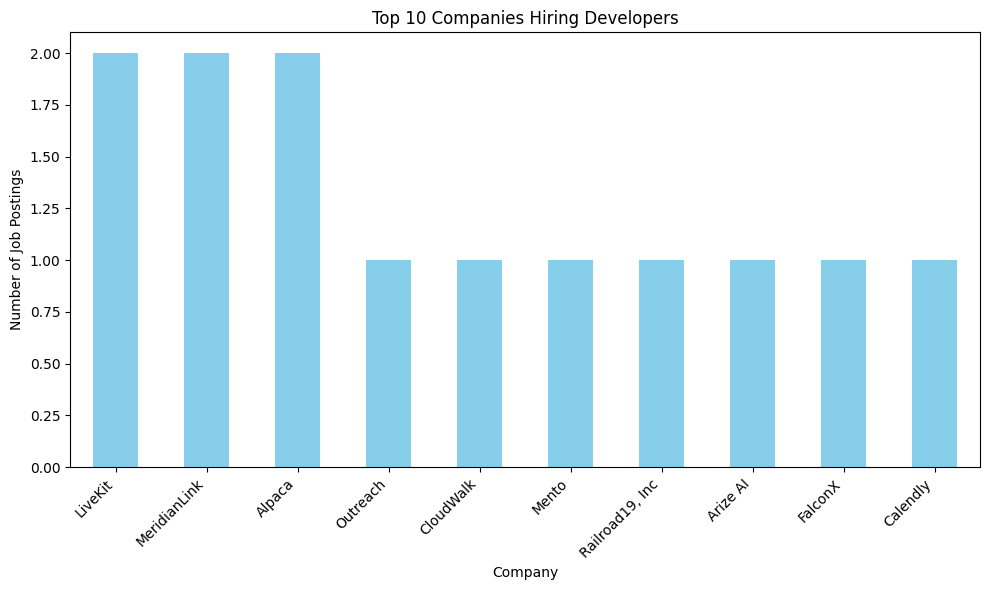

In [15]:
top_companies = developer_jobs['Company'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_companies.plot(kind='bar', color='skyblue')
plt.title("Top 10 Companies Hiring Developers")
plt.xlabel("Company")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Top Locations for Developer Jobs

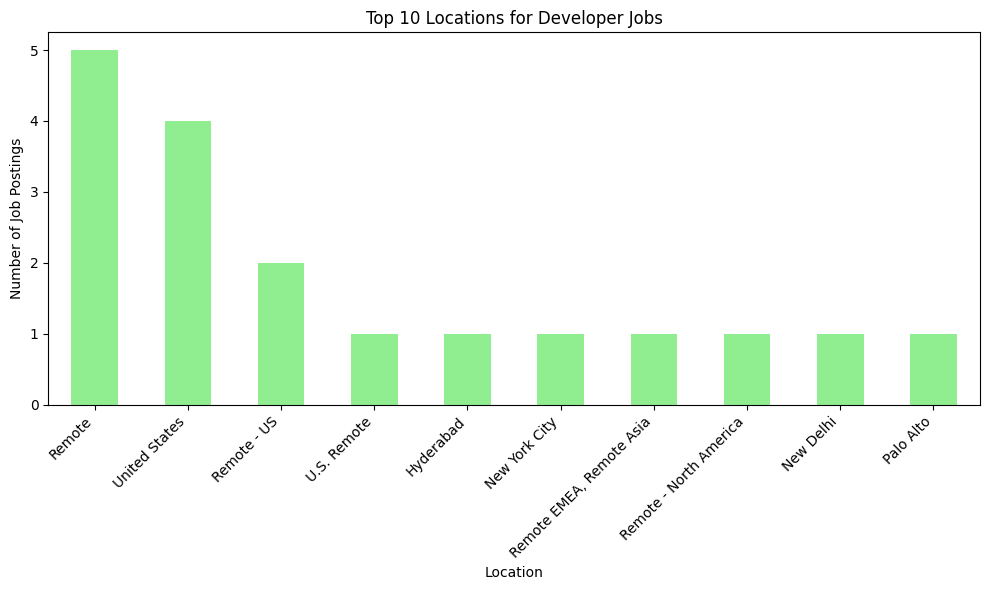

In [16]:
top_locations = developer_jobs['Location'].value_counts().head(10)
plt.figure(figsize=(10,6))
top_locations.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Locations for Developer Jobs")
plt.xlabel("Location")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Most Common Skills / Tags

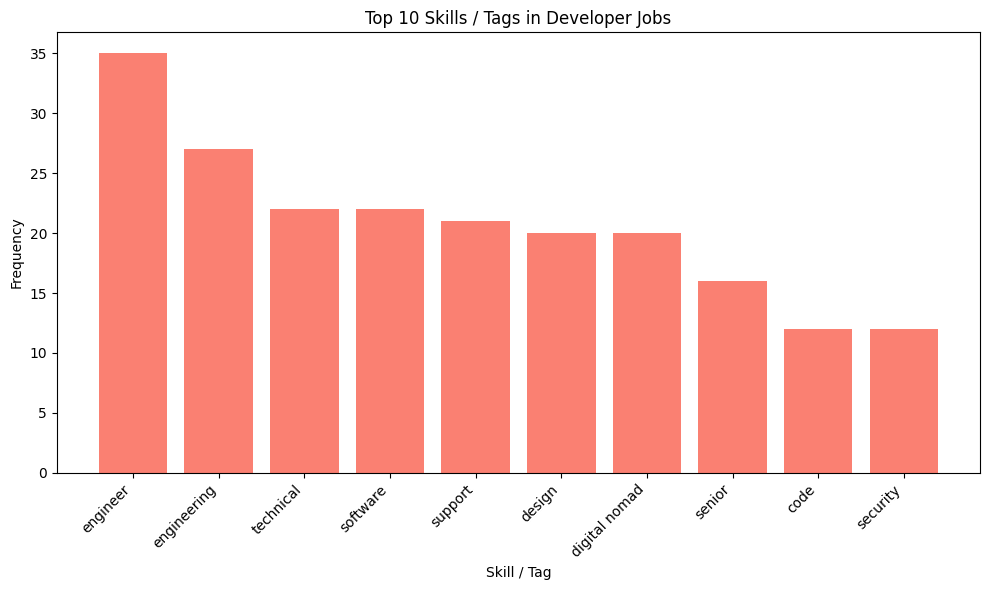

In [17]:
all_tags = developer_jobs['Tags'].str.split(', ').sum()
tag_counts = Counter(all_tags).most_common(10)
tags_dict = dict(tag_counts)

plt.figure(figsize=(10,6))
plt.bar(tags_dict.keys(), tags_dict.values(), color='salmon')
plt.title("Top 10 Skills / Tags in Developer Jobs")
plt.xlabel("Skill / Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Conclusions & Insights

## 1. Project Summary
This project demonstrates how web scraping can automate the sourcing of job vacancies for a recruitment agency. 
I collected 98 job postings from Remote OK and extracted fields such as job title, company, location, skills/tags, and date collected.

## 2. Key Findings
- **Developer Jobs Are in High Demand:** Positions like Software Engineer, Full Stack Engineer, Backend Engineer, and Frontend Engineer are prevalent.
- **Top Companies Hiring Developers:** Some companies post significantly more openings than others, indicating where clients should focus.
- **Locations:** Many jobs are remote-friendly, while some locations appear more frequently.
- **Skills in Demand:** Python, JavaScript, and full-stack frameworks appear frequently in tags.

## 3. Challenges & Solutions
- **Empty Filter Result:** Filtering by “developer” initially returned zero results. Solution: used multiple keywords and Tags for filtering.
- **Data Cleaning:** Converted columns to strings to handle NaN values and ensure consistent filtering.

## 4. What Sets This Project Apart
- Modular and reusable Python functions
- Ethical and reliable scraping using a public API
- Realistic and actionable business insights
- Portfolio-ready visualizations

## 5. Future Improvements
- Automate daily scraping to capture new postings
- Store data in a database for historical analysis
- Include salary, experience level, and job type
- Use NLP for more accurate job classification
